In [50]:
#Import Required Packages
import nltk
import pandas as pd
import numpy as np

In [51]:
#Import the Entire Data Set
wholeData = pd.read_csv('C:/Users/phili/Downloads/new_VaccineTweets.csv')
wholeData.head(5)

,Unnamed: 0,Unnamed: 0.1,user_id,screen_name,text,buckets,fake,pred_buckets,pred_fake,tweet_clean,...,media_type,lang,location,description,followers_count,friends_count,listed_count,statuses_count,favourites_count,verified
0,0,0,x1000011391,thefiltersaurus,very happy to donate during our first #MaxFunD...,personal,0,personal,0,very happy to donate during our first maxfundr...,...,NaN,en,"Pittsburgh, PA",NaN,15,280,0,705,264,False
1,1,1,x1000036263385280513,Candace_412,@Breaking911 Stolen ID - jail. Convict welfare...,irrelevant,0,irrelevant,0,stolen id jail convict welfare fraud tax fraud...,...,NaN,en,"Pittsburgh, PA",PolishÔ£ø√º√°¬µÔ£ø√º√°¬± HungarianÔ£ø√º√°‚â†Ô£...,1276,1605,12,8200,27046,False
2,2,2,x1000068751809699840,FoundationVeer,RT unfoundation: #Vaccines don‚Äö√Ñ√¥t just sa...,irrelevant,0,irrelevant,0,unfoundation vaccines don t just save lives th...,...,photo,en,"New Delhi, India",Official Twitter account of Veer Foundation\r\...,321,2,7,21061,3,True
3,3,3,x1000068751809699840,FoundationVeer,"RT UNDP ""5 ways #Solar4Health can make #univer...",irrelevant,0,irrelevant,1,undp 5 ways solar4health can make universalhea...,...,photo,en,"New Delhi, India",Official Twitter account of Veer Foundation\r\...,324,2,7,21284,3,True
4,4,4,x1000068751809699840,FoundationVeer,"RT unfoundation: In devex Opinion, our Vice Pr...",news,0,news,0,unfoundation in devex opinion our vice preside...,...,NaN,en,"New Delhi, India",Official Twitter account of Veer Foundation\r\...,324,2,7,21284,3,True


In [52]:
#Just keep labled data
data = wholeData[wholeData.pred_buckets == "claim"]
data.head()

,Unnamed: 0,Unnamed: 0.1,user_id,screen_name,text,buckets,fake,pred_buckets,pred_fake,tweet_clean,...,media_type,lang,location,description,followers_count,friends_count,listed_count,statuses_count,favourites_count,verified
10,10,10,x1000385670916067328,SowellJeri,His plan is anti-science nonsense. Vaccines ar...,claim,0,claim,0,his plan is anti science nonsense vaccines are...,...,NaN,en,NaN,is this life or am i just that unlucky?,2,12,0,68,116,False
12,12,12,x100039370,PoetryAlive,"Are ""chickenpox parties"" safer than vaccines? ...",claim,0,claim,0,are chickenpox paies safer than vaccines absol...,...,NaN,en,"Asheville, NC",Celebrating 33 years of bringing affordable an...,477,551,17,38795,130,False
13,13,13,x100039370,PoetryAlive,A large new study finds kids who got no childh...,claim,1,claim,1,a large new study finds kids who got no childh...,...,NaN,en,"Asheville, NC",Celebrating 33 years of bringing affordable an...,477,551,17,38795,130,False
14,14,14,x1000400324216180737,Destiny43560519,Anti-vaxxers : tHe bLaCK pLaUgE wEnT aWAy wiTh...,claim,0,claim,0,anti vaxxers the black plauge went away withou...,...,NaN,en,The trashcan,Subscribe to Pewdiepie or else I'll steal your...,29,38,0,205,476,False
16,16,16,x1000414806233493505,UnifiedSubtext,@CDCDirector @nytopinion @HHS_ASH @Surgeon_Gen...,claim,1,claim,1,my girlfriend s mother had a reaction to the f...,...,NaN,en,"Atlanta, GA",Transparent is the new black.,391,499,1,1660,12445,False


In [6]:
len(data)

181

In [8]:
#Just keep Text and Labels
#data.columns
data = data.loc[:,["fake","text"]]

data = data.reset_index(drop=True)
data.head(10)

,fake,text
0,0,His plan is anti-science nonsense. Vaccines ar...
1,0,"Are ""chickenpox parties"" safer than vaccines? ..."
2,1,A large new study finds kids who got no childh...
3,0,Anti-vaxxers : tHe bLaCK pLaUgE wEnT aWAy wiTh...
4,1,@CDCDirector @nytopinion @HHS_ASH @Surgeon_Gen...
5,1,@jsbmbaggedmilk @catmsilverman But they put me...
6,0,@FakeNotFakeNews Rwpeatedly answered in past Q...
7,0,"@Awoo44 If I had kids, absolutely I would. Id ..."
8,0,@Jeffmdcare @Golfergirl2018 @HighWireTalk @Ame...
9,0,Drugs and vaccines are less¬¨‚Ä†important http...


In [9]:
data = data[(data.fake == "0") | (data.fake == "1")]

In [10]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['text'] = data.text.map(alphanumeric).map(punc_lower)
data.head()

,fake,text
0,0,his plan is anti science nonsense vaccines ar...
1,0,are chickenpox parties safer than vaccines ...
2,1,a large new study finds kids who got no childh...
3,0,anti vaxxers the black plauge went away with...
4,1,cdcdirector nytopinion hhs ash surgeon gen...


In [11]:
##Count Vectorizer of the Text Data and Split 80/20
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words= "english")
Mat1_train = vectorizer.fit_transform(data.text)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Mat1_train, data.fake, test_size=0.2)

In [12]:
#Multinomial Naive Bayes for Count Vector, Unigram.
from sklearn.naive_bayes import MultinomialNB

#Create the Model
mnb = MultinomialNB()

# fit the model with data
mnb.fit(X_train,y_train)

# Get the predicions
y_pred=mnb.predict(X_test)

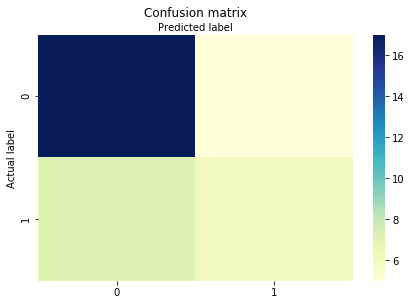

In [18]:
#Find Accuracy and confusion matrix for Count Vector, Bigram, Logistic Regression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

class_names=['FALSE', 'TRUE']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=False, cmap="YlGnBu" ,fmt='g', )
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label="0"))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label="0"))
print("F1 Score:",metrics.f1_score(y_test, y_pred, pos_label="0"))

Accuracy: 0.7714285714285715
Precision: 0.8148148148148148
Recall: 0.88
F1 Score: 0.8461538461538461


In [13]:
all_claims = wholeData[wholeData.pred_buckets == "claim"]
all_Text= wholeData.loc[:,["text"]]


# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

all_Text['text'] = all_Text.text.map(alphanumeric).map(punc_lower)
all_Text.head()

,text
0,very happy to donate during our first maxfund...
1,stolen id jail convict welfare fraud tax...
2,rt unfoundation vaccines don‚äö√ñ√¥t just sa...
3,rt undp ways can make universalhealthca...
4,rt unfoundation in devex opinion our vice pr...


In [14]:
##Count Vectorizer of the Text Data
from sklearn.feature_extraction.text import CountVectorizer

Mat1_train = vectorizer.transform(all_Text.text)

In [15]:

# Get the predicions
y_pred=mnb.predict(Mat1_train)

In [17]:
print(y_pred)

['0' '0' '0' ... '0' '1' '0']


In [19]:
wholeData["pred_fake"] = y_pred

In [20]:
wholeData

,Unnamed: 0,user_id,screen_name,text,buckets,fake,pred_buckets,pred_fake,tweet_clean,source,...,media_type,lang,location,description,followers_count,friends_count,listed_count,statuses_count,favourites_count,verified
0,0,x1000011391,thefiltersaurus,very happy to donate during our first #MaxFunD...,personal,0,personal,0,very happy to donate during our first maxfundr...,Twitter for iPhone,...,NaN,en,"Pittsburgh, PA",NaN,15,280,0,705,264,False
1,1,x1000036263385280513,Candace_412,@Breaking911 Stolen ID - jail. Convict welfare...,irrelevant,0,irrelevant,0,stolen id jail convict welfare fraud tax fraud...,Twitter for Android,...,NaN,en,"Pittsburgh, PA",PolishÔ£ø√º√°¬µÔ£ø√º√°¬± HungarianÔ£ø√º√°‚â†Ô£...,1276,1605,12,8200,27046,False
2,2,x1000068751809699840,FoundationVeer,RT unfoundation: #Vaccines don‚Äö√Ñ√¥t just sa...,irrelevant,0,irrelevant,0,unfoundation vaccines don t just save lives th...,IFTTT,...,photo,en,"New Delhi, India",Official Twitter account of Veer Foundation\n ...,321,2,7,21061,3,True
3,3,x1000068751809699840,FoundationVeer,"RT UNDP ""5 ways #Solar4Health can make #univer...",irrelevant,0,irrelevant,1,undp 5 ways solar4health can make universalhea...,IFTTT,...,photo,en,"New Delhi, India",Official Twitter account of Veer Foundation\n ...,324,2,7,21284,3,True
4,4,x1000068751809699840,FoundationVeer,"RT unfoundation: In devex Opinion, our Vice Pr...",news,0,news,0,unfoundation in devex opinion our vice preside...,IFTTT,...,NaN,en,"New Delhi, India",Official Twitter account of Veer Foundation\n ...,324,2,7,21284,3,True
5,5,x1000089179697577984,BabyBuckyBarnes,My mum found the NHS note for school about get...,personal,0,personal,0,my mum found the nhs note for school about get...,Twitter for iPhone,...,photo,en,"Aberdeen, Scotland","""they say that the loveliest angels make the c...",120,156,2,323,418,False
6,6,x1000106205681876992,Gretche03478644,@AwakeNancyRN @maie_lynn @RyanMarino @ktibus @...,irrelevant,0,irrelevant,0,im a pediatric nurse i ve taken care of a chil...,Twitter for iPhone,...,NaN,en,"San Diego, CA","Strictly feminist, Child advocate",126,275,2,4681,64447,False
7,7,x1000144217019006976,AllisonGator1,@PaulNas77729354 @FortuneMagazine I‚Äö√Ñ√¥m no...,personal,0,personal,0,i m not antivaxx but just curious so the japan...,Twitter for iPhone,...,NaN,en,"British Columbia, Canada",Whatever,0,20,0,12,12,False
8,8,x1000172920830939139,AustinStevensMI,@KrahnPhillip @QuoteMeOnThatK @RossGilroy @Joh...,irrelevant,0,irrelevant,1,gates argument is that if parents have access ...,Twitter for iPhone,...,NaN,en,"Michigan, USA",Native Michigander with stops in Louisiana and...,203,431,0,13601,7633,False
9,9,x1000279445733888000,martidxlan,Sul pullman hanno messo ‚Äö√Ñ√∫All my friends ...,irrelevant,0,irrelevant,0,sul pullman hanno messo all my friends are fal...,Twitter for iPhone,...,NaN,en,"Borgosesia, Piemonte","don‚Äö√Ñ√¥t care, take a nap ‚Äö√ª‚àû",46,82,0,76,561,False


In [24]:
#wholeData.to_csv("C:/Users/phili/Downloads/NEW_VaccineTweets.csv")